# <font color='#F2622E'>ONLINE PAYMENTS FRAUD DETECTION

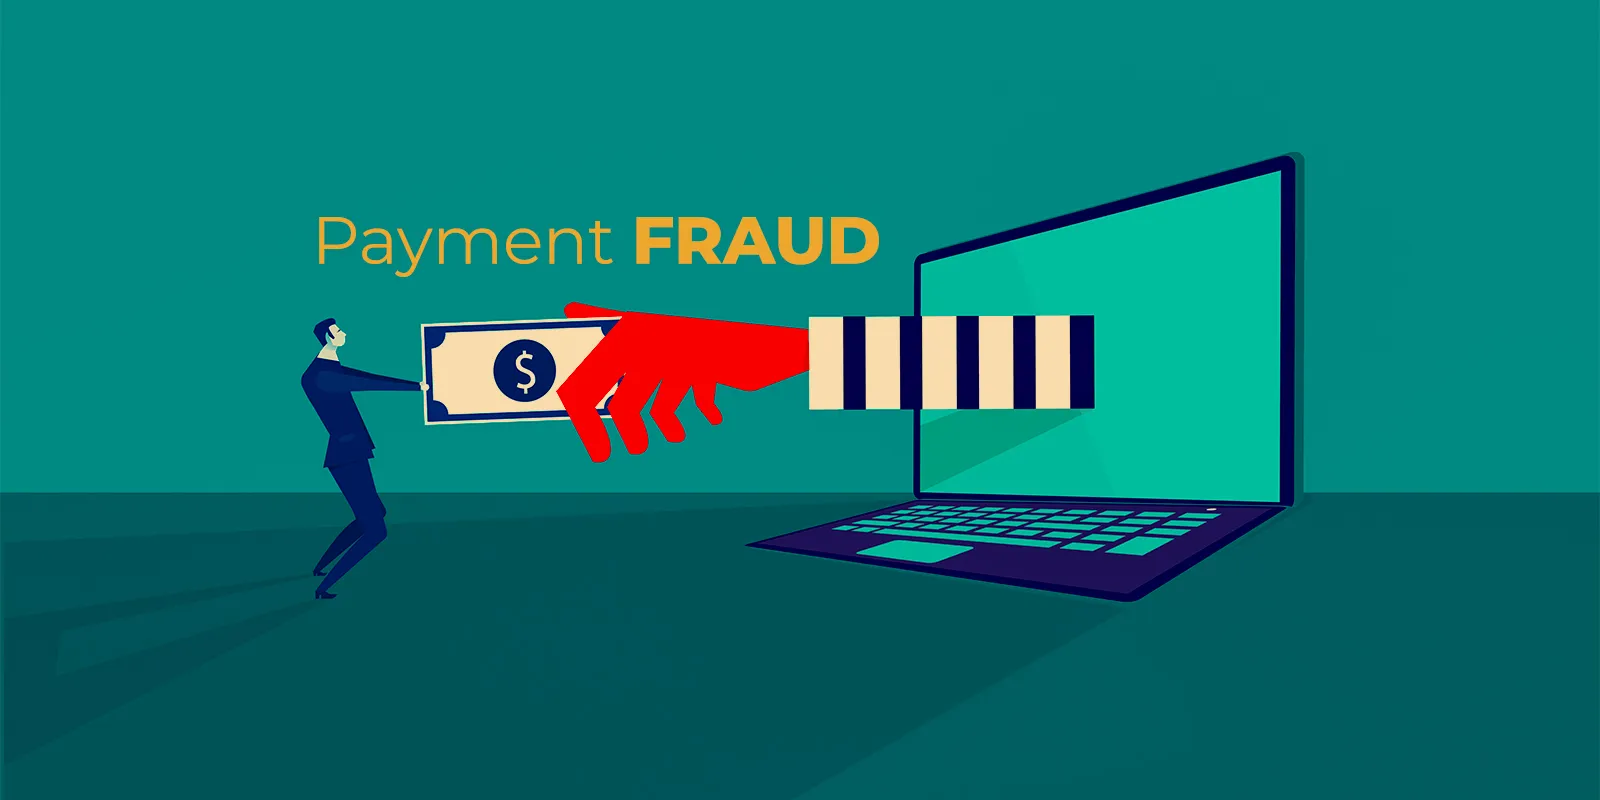

## <font color='#F2622E'>Introduction
With the increasing digitalization of financial transactions, online payment fraud has become a significant concern for financial institutions, businesses, and consumers. Fraudulent transactions can lead to substantial financial losses and erode trust in online payment systems. This project aims to develop a machine learning model to detect fraudulent transactions in online payments, helping to prevent fraud and enhance transaction security.

## <font color='#F2622E'>Aim
The objective of this project is to analyze online transaction data and build a predictive model to identify fraudulent activities. By leveraging various machine learning techniques, we aim to detect patterns that distinguish fraudulent transactions from legitimate ones, ultimately improving fraud detection systems.

## <font color='#F2622E'>Dataset Description
The dataset consists of multiple transaction records, each containing information about the transaction type, amount, source, destination, and fraud labels. Below is a brief description of the dataset columns:

- **step**: Represents the unit of time (typically an hour) when the transaction was made.
- **type**: The type of transaction (e.g., PAYMENT, TRANSFER, CASH_OUT).
- **amount**: The amount of money involved in the transaction.
- **nameOrig**: The identifier of the sender of the transaction.
- **oldbalanceOrg**: The sender's balance before the transaction.
- **newbalanceOrig**: The sender's balance after the transaction.
- **nameDest**: The identifier of the receiver of the transaction.
- **oldbalanceDest**: The receiver's balance before the transaction.
- **newbalanceDest**: The receiver's balance after the transaction.
- **isFraud**: A binary indicator (1 for fraudulent transactions, 0 for legitimate ones).
- **isFlaggedFraud**: A binary indicator showing if the transaction was flagged as fraudulent by the system.

By analyzing these features, we will develop models to predict whether a transaction is fraudulent, thereby enhancing security in online payments.

##  <font color='#F2622E'> Requirements

In [2]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## <font color='#F2622E'> Import Data

In [3]:
df=pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')

## <font color='#F2622E'> EDA (Exploratory Data Analysis)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## <font color='#F2622E'> Data Visualization

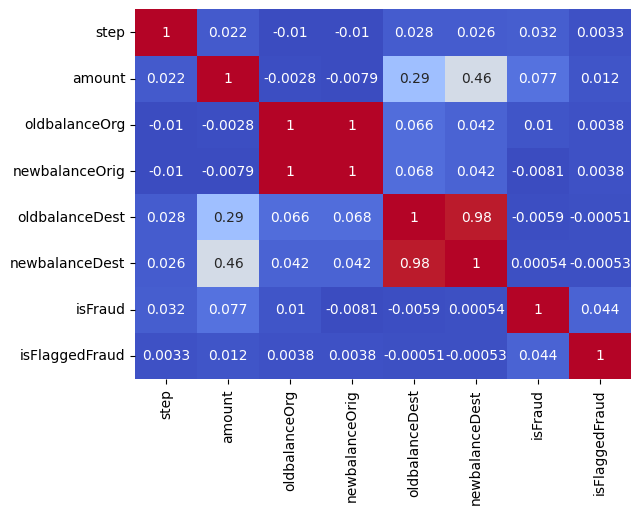

In [4]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',cbar=None);

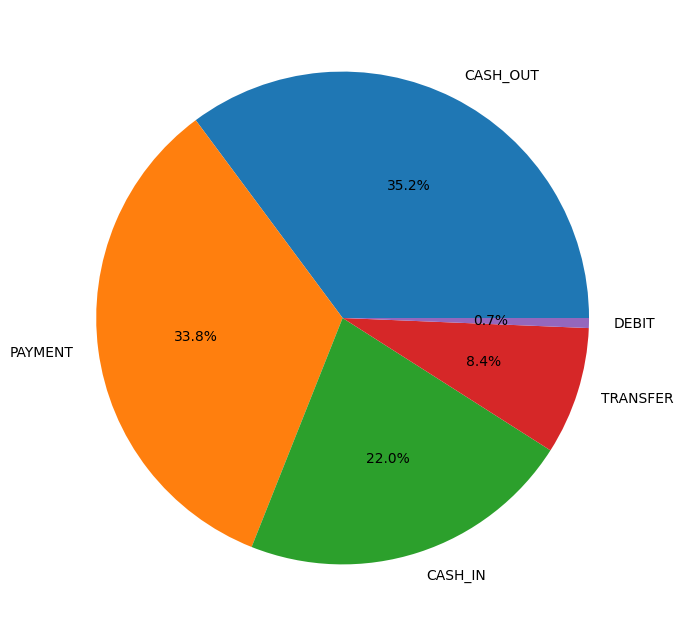

In [5]:
plt.figure(figsize=(10,8))
plt.pie(df['type'].value_counts(),
       labels=df['type'].value_counts().index,
       autopct='%1.1f%%');

## <font color='#F2622E'> Modelling with Conversational Methods

In [6]:
x=df.drop(columns=['nameOrig','nameDest','isFraud','isFlaggedFraud'],axis=1)
y=df[['isFraud']]

In [7]:
x.shape,y.shape

((6362620, 7), (6362620, 1))

In [8]:
x=pd.get_dummies(x,drop_first=True)

In [9]:
def classification_algo(x, y, confusion_mtr=False, classification_rpt=False):
    g = GaussianNB()
    b = BernoulliNB()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    h = GradientBoostingClassifier()
    k = KNeighborsClassifier()
    
    algos = [g, b, l, d, rf, h, k]
    algo_names = ['Gaussian NB', 'Bernoulli NB', 'Logistic Regression', 
                  'Decision Tree Classifier', 'Random Forest Classifier', 
                  'Gradient Boosting Classifier', 'KNeighbors Classifier']

    accuracy = []
    confusion = []
    classification = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Prepare a DataFrame to store results
    result = pd.DataFrame(columns=['Accuracy Score', 'Confusion Matrix', 'Classification Report'], 
                          index=algo_names)

    # Get unique labels from df["Credit_Score"]
    labels = sorted(y["isFraud"].unique())

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        confusion.append(confusion_matrix(y_test, p, labels=labels))
        classification.append(classification_report(y_test, p))

    # Store results
    result['Accuracy Score'] = accuracy
    result['Confusion Matrix'] = confusion
    result['Classification Report'] = classification

    # Sort results by accuracy
    r_table = result.sort_values('Accuracy Score', ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
            confusion_mat = np.array(row['Confusion Matrix'])
            print(f"Confusion Matrix of {index}")
            plt.figure(figsize=(5, 4))
            sns.heatmap(confusion_mat, annot=True, fmt="d", 
                        xticklabels=labels, yticklabels=labels, cmap="Blues",cbar=None)
            plt.xlabel("Predicted Labels")
            plt.ylabel("True Labels")
            plt.show()
    
    if classification_rpt:
        for index, row in r_table.iterrows():
            print(f"Classification Report of {index}:")
            print(row['Classification Report'])

    return r_table[['Accuracy Score']]

Confusion Matrix of Random Forest Classifier


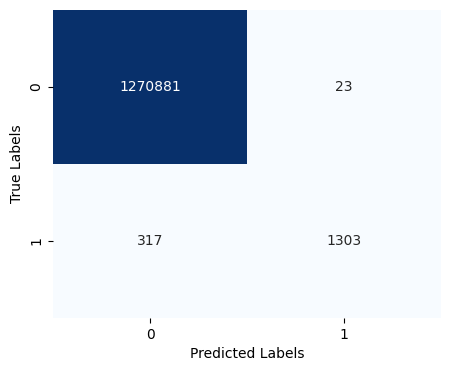

Confusion Matrix of Decision Tree Classifier


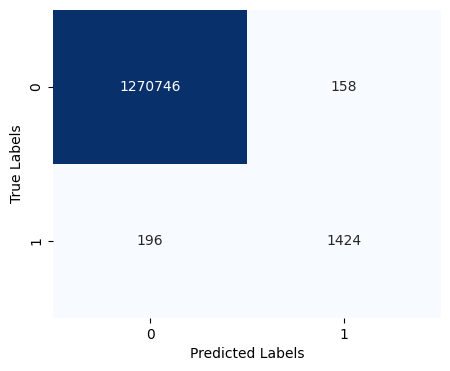

Confusion Matrix of KNeighbors Classifier


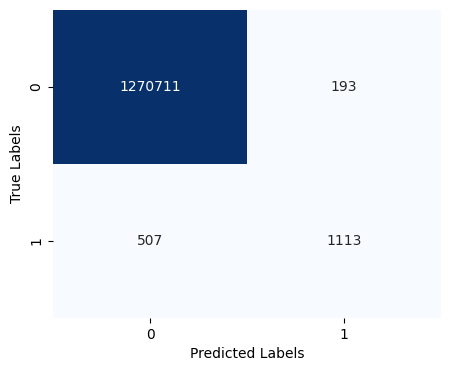

Confusion Matrix of Gradient Boosting Classifier


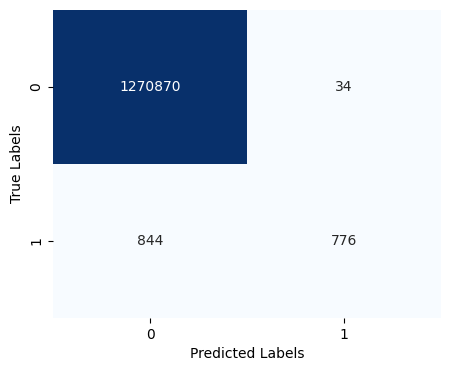

Confusion Matrix of Bernoulli NB


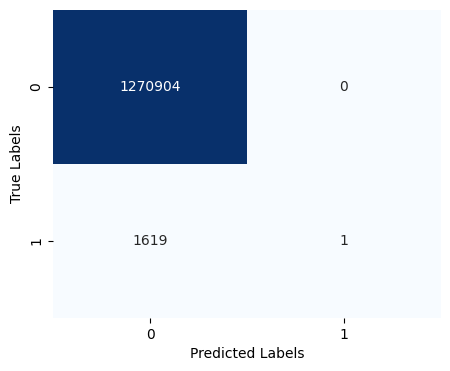

Confusion Matrix of Logistic Regression


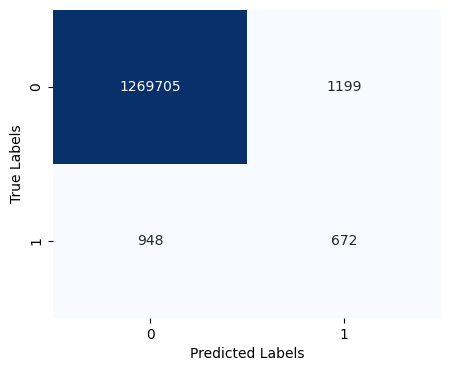

Confusion Matrix of Gaussian NB


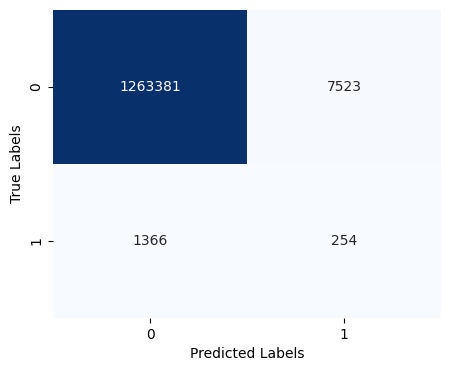

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.80      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.88      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

Classification Report of KNeighbors Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.85      0.69      0.76      1620

    accuracy                    

,Accuracy Score
Random Forest Classifier,0.999733
Decision Tree Classifier,0.999722
KNeighbors Classifier,0.999450
Gradient Boosting Classifier,0.999310
Bernoulli NB,0.998728
Logistic Regression,0.998313
Gaussian NB,0.993015


In [11]:
classification_algo(x,y,confusion_mtr=True,classification_rpt=True)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [13]:
rf = RandomForestClassifier()
model=rf.fit(x_train,y_train)
predictions=model.predict(x_test)
score=accuracy_score(y_test,predictions)
score

0.9997273135909421

## <font color='#F2622E'> Modelling with Deep Learning

In [8]:
x=df.drop(columns=['nameOrig','nameDest','isFraud','isFlaggedFraud'],axis=1)
y=df[['isFraud']]

In [9]:
x=pd.get_dummies(x,drop_first=True)

In [10]:
model=Sequential()
model.add(Dense(8,activation='relu')) 
model.add(Dense(120,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
x_train , x_test, y_train, y_test =train_test_split(x,y,test_size=.2,random_state=42)

In [12]:
x_train.shape,y_train.shape

((5090096, 10), (5090096, 1))

In [13]:
history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=.20,verbose=1)

Epoch 1/5
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 228s 2ms/step - accuracy: 0.9985 - loss: 31.5636 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 2/5
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 220s 2ms/step - accuracy: 0.9987 - loss: 0.0100 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 3/5
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 220s 2ms/step - accuracy: 0.9987 - loss: 0.0098 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 4/5
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 218s 2ms/step - accuracy: 0.9987 - loss: 0.0102 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 5/5
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 218s 2ms/step - accuracy: 0.9987 - loss: 0.0100 - val_accuracy: 0.9987 - val_loss: 0.0098


In [25]:
predictions=model.predict(x_test)
predictions_labels = np.argmax(predictions, axis=1)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step


In [35]:
y_test_np = y_test.to_numpy().flatten()
accuracy_score(y_test_np, predictions_labels)

0.9987269395311994

## <font color='#F2622E'>Conclusion

In this project, we developed various machine learning models to detect fraudulent transactions in online payments. Among the classifiers evaluated, the **Random Forest Classifier** achieved the highest accuracy of **99.97%**, outperforming other models such as Decision Tree, K-Nearest Neighbors, and Gradient Boosting. The confusion matrix of the Random Forest model highlights its effectiveness in correctly identifying both fraudulent and non-fraudulent transactions, with minimal false positives and false negatives.

Additionally, we explored deep learning techniques, which resulted in an accuracy of **99.87%**. While deep learning showed competitive performance, the Random Forest model provided slightly better results with lower computational cost, making it a more practical choice for fraud detection in this dataset.

Overall, our analysis demonstrates that machine learning models can significantly enhance fraud detection in online payments. Future work could involve further feature engineering, balancing the dataset to handle class imbalance, and experimenting with ensemble learning techniques to further improve performance.